<a href="https://colab.research.google.com/github/Goyo0117970/TelecomX-2/blob/main/TelecomX%202%20Machine%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFORME:
El siguiente Análisis busca identificar posibles factores de deserción de clientes de la Empresa Telecom X, ya que muchos han decidio prescindir de nuestros servicios, lo cual es preocupante para la Gerencia, por este motivo hacen entrega de archivo de base de datos para realizar el análisis correspondiente del caso y detectar el o los posibles motivos de estas decisiones negativas que afectan de manera directa a esta empresa. En un estudio inicla se realizó con herramientas de análisis no tan sofisticadas como las que se implementarán a continuación y esto se hará con Machine Learning, lo cual es una herramienta muy robusta y especialmente diseñada para este tipo de caso. Esta base de datos maneja los siguientes campos:

Diccionario de datos

customerID: número de identificación único de cada cliente

Churn: si el cliente dejó o no la empresa

gender: género (masculino y femenino)

SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

Partner: si el cliente tiene o no una pareja

Dependents: si el cliente tiene o no dependientes

tenure: meses de contrato del cliente

PhoneService: suscripción al servicio telefónico

MultipleLines: suscripción a más de una línea telefónica

InternetService: suscripción a un proveedor de internet

OnlineSecurity: suscripción adicional de seguridad en línea

OnlineBackup: suscripción adicional de respaldo en línea

DeviceProtection: suscripción adicional de protección del dispositivo

TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

StreamingTV: suscripción de televisión por cable

StreamingMovies: suscripción de streaming de películas

Contract: tipo de contrato

PaperlessBilling: si el cliente prefiere recibir la factura en línea

PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

Charges.Total: total gastado por el cliente

##📌 Extracción

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
dato = requests.get(url)

##🔧 Transformación

In [30]:
data = dato.json()
df = pd.json_normalize(data)
#print(df.head())
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [31]:
df.to_json('/content/sample_data/TelecomX_Data.json')

##Respaldando en excel

In [32]:
df.to_excel('/content/sample_datatelecomX.xlsx')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

##Explorando datos nulos

In [34]:
print(df.isnull().sum())

print(df.describe())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64
       customer.SeniorCitizen  customer.tenure  account.Charges.Monthly
count             7267.000000      7267.000000              7267.000000
mean                 0.162653        32.346498                64.720098
std                  0.369074        24.571773                30.129572
min                  0.000000         0.000000  

In [35]:
df[df['Churn'].isnull()]              # Valores nulos
df[df['Churn'].str.strip() == '']     # Cadenas vacías

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [36]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [24]:
df.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,account.Charges.Total_995.35,account.Charges.Total_996.45,account.Charges.Total_996.85,account.Charges.Total_996.95,account.Charges.Total_997.65,account.Charges.Total_997.75,account.Charges.Total_998.1,account.Charges.Total_999.45,account.Charges.Total_999.8,account.Charges.Total_999.9
0,0,9,65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,9,59,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4,73,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,13,98,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,83,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
print(df.columns)
print(df.dtypes['Churn'] if 'Churn' in df.columns else "Churn no está en el DataFrame")

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')
float64


In [39]:
# --- Eliminar filas con Churn nulo ---
df = df[df['Churn'].notna()]

# --- Paso 1: Separar variable objetivo ---
y = df['Churn']
X = df.drop(columns=['Churn'])

# --- Paso 2: Codificar variables categóricas ---
X_encoded = pd.get_dummies(X, drop_first=True)

# --- Paso 3: División entrenamiento/prueba ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


Accuracy: 0.7934705464868701

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1035
         1.0       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



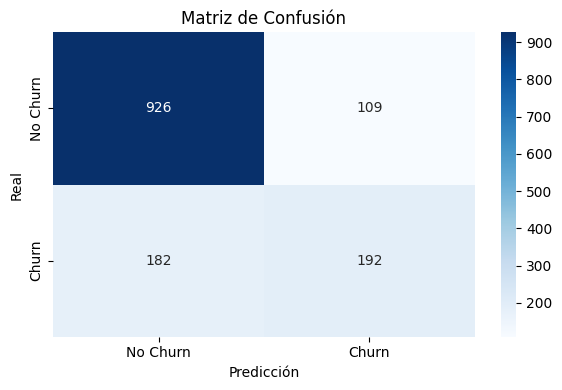

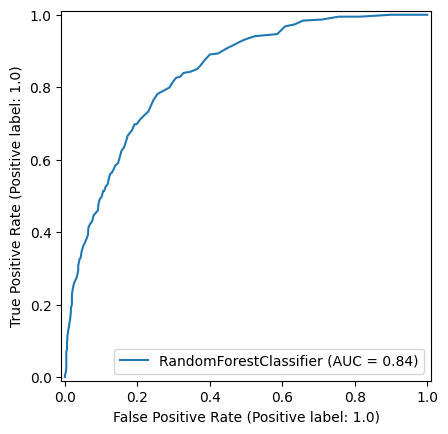

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# --- Paso 1: Separar variable objetivo antes de codificar ---
y = df['Churn']  # objetivo (ya en 0 y 1)
X = df.drop(columns=['Churn'])  # todas menos Churn

# --- Paso 2: Codificar solo las variables predictoras ---
X_encoded = pd.get_dummies(X, drop_first=True)

# --- Paso 3: División entrenamiento/prueba ---
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# --- Paso 4: Entrenamiento del modelo ---
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # ayuda con el desbalance de clases
)
model.fit(X_train, y_train)

# --- Paso 5: Predicción y evaluación ---
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Matriz de confusión ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.title("Matriz de Confusión")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# --- Curva ROC ---
roc_display = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


Matriz de confusión

In [41]:
print(df['Churn'].unique())

[0. 1.]


In [ ]:
df.shape

(7043, 21)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [02:05:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7494677075940384

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      1035
         1.0       0.52      0.67      0.59       374

    accuracy                           0.75      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409



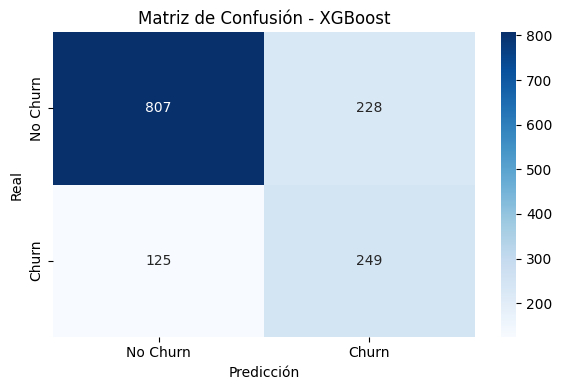

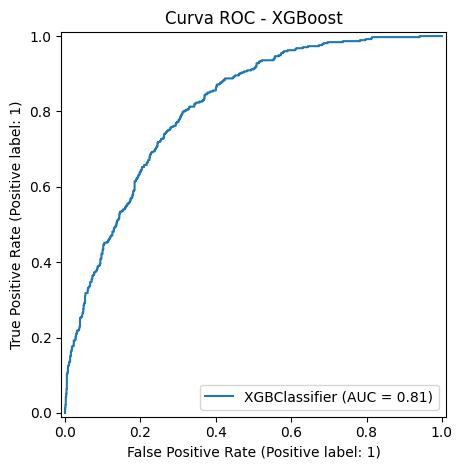

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# --- Preparación de datos ---
y = df['Churn']
X = df.drop(columns=['Churn'])
X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# --- Entrenamiento del modelo XGBoost ---
model = xgb.XGBClassifier(
    random_state=42,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # ayuda con clases desbalanceadas
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

# --- Predicción y evaluación ---
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Matriz de confusión ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Matriz de Confusión - XGBoost")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# --- Curva ROC ---
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("Curva ROC - XGBoost")
plt.tight_layout()
plt.show()



Classification Report (umbral ajustado):
              precision    recall  f1-score   support

         0.0       0.88      0.74      0.80      1035
         1.0       0.50      0.73      0.60       374

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409



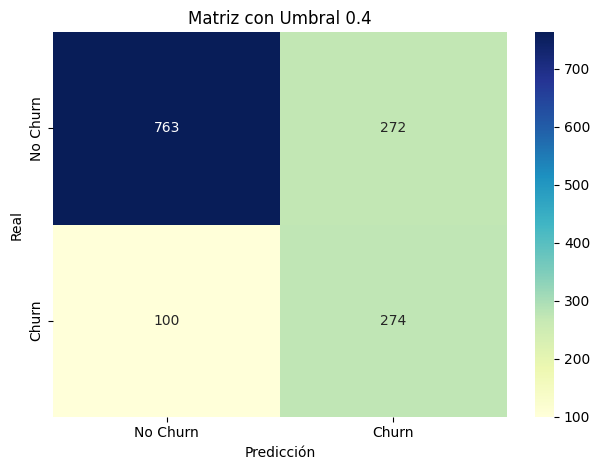

In [43]:
y_proba = model.predict_proba(X_test)[:, 1]

# Ajustamos el umbral
threshold = 0.4
y_pred_adjusted = (y_proba > threshold).astype(int)

# Evaluamos con el nuevo umbral
print("\nClassification Report (umbral ajustado):")
print(classification_report(y_test, y_pred_adjusted))

# Nueva matriz de confusión
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(cm_adjusted, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title(f"Matriz con Umbral {threshold}")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


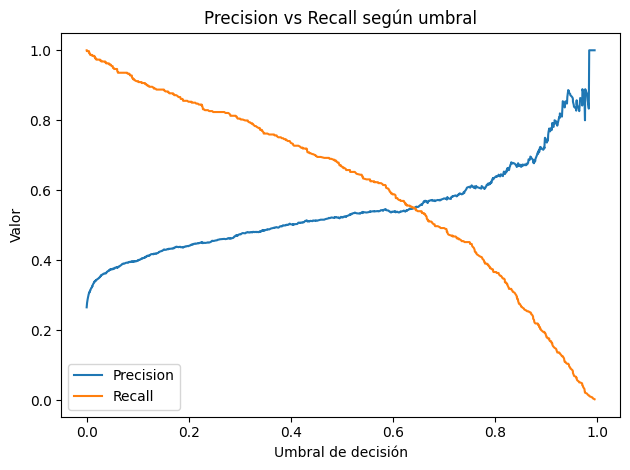

In [44]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Umbral de decisión')
plt.ylabel('Valor')
plt.legend()
plt.title("Precision vs Recall según umbral")
plt.tight_layout()
plt.show()


In [46]:
y_proba = model.predict_proba(X_test)[:, 1]
umbral_optimo = 0.3  # Puedes ajustar este valor según tu análisis

y_pred_ajustado = (y_proba > umbral_optimo).astype(int)

print("Accuracy ajustado:", accuracy_score(y_test, y_pred_ajustado))
print("\nClassification Report (umbral ajustado):\n", classification_report(y_test, y_pred_ajustado))


Accuracy ajustado: 0.7118523775727467

Classification Report (umbral ajustado):
               precision    recall  f1-score   support

         0.0       0.91      0.68      0.78      1035
         1.0       0.47      0.80      0.60       374

    accuracy                           0.71      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.71      0.73      1409



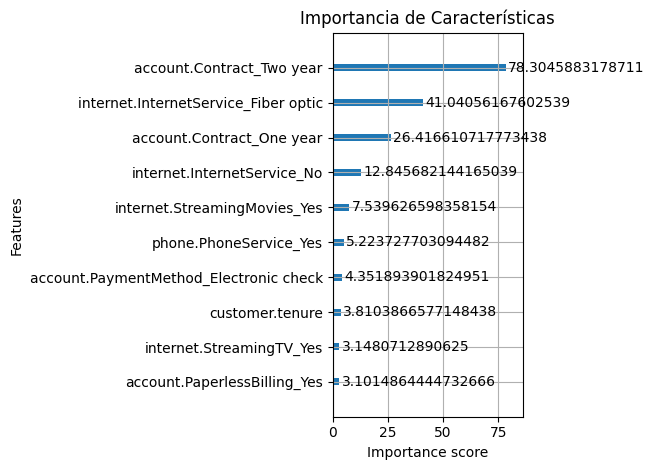

In [47]:
xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Importancia de Características")
plt.tight_layout()
plt.show()


In [48]:
from sklearn.metrics import roc_auc_score
print("AUC:", roc_auc_score(y_test, y_proba))


AUC: 0.812491926942055


##Procedemos a Filtrar tan solo los clientes que abandonaron

In [ ]:
abandona = df[(df['Churn'] == 'Yes')]
abandona.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4
18,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Credit card (automatic),62.7,2791.5
19,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.1,25.1


##Exploraremos para visualizar los porcentajes combinando diferentes campos

In [ ]:
agrupado= abandona.groupby(['customer.gender', 'internet.InternetService','phone.PhoneService']).size().reset_index(name='cantidad')
total_abandono=abandona.shape[0]
agrupado['porcentaje'] =round((agrupado['cantidad']/total_abandono)*100,2)
agrupado

,customer.gender,internet.InternetService,phone.PhoneService,cantidad,porcentaje
0,Female,DSL,No,80,4.28
1,Female,DSL,Yes,139,7.44
2,Female,Fiber optic,Yes,664,35.53
3,Female,No,Yes,56,3.00
4,Male,DSL,No,90,4.82
5,Male,DSL,Yes,150,8.03
6,Male,Fiber optic,Yes,633,33.87
7,Male,No,Yes,57,3.05


En este primer análisis se observa que el servicio de Fibra óptica con Teléfono posee porcentajes muy alto, también puede observarse que entre géneros no hay muchas diferencias 35,53 y 33,87


In [ ]:
agrupado= abandona.groupby(['internet.InternetService','phone.PhoneService', 'account.Contract']).size().reset_index(name='cantidad')
total_abandono=abandona.shape[0]
agrupado['porcentaje'] =round((agrupado['cantidad']/total_abandono)*100,2)
agrupado

,internet.InternetService,phone.PhoneService,account.Contract,cantidad,porcentaje
0,DSL,No,Month-to-month,153,8.19
1,DSL,No,One year,14,0.75
2,DSL,No,Two year,3,0.16
3,DSL,Yes,Month-to-month,241,12.89
4,DSL,Yes,One year,39,2.09
5,DSL,Yes,Two year,9,0.48
6,Fiber optic,Yes,Month-to-month,1162,62.17
7,Fiber optic,Yes,One year,104,5.56
8,Fiber optic,Yes,Two year,31,1.66
9,No,Yes,Month-to-month,99,5.30


Se observa el mayor abandono de los clientes de Fibra óptica,teléfono con pagos mes a mes 62,17%, es un número muy significativo

Realizaremos un análisis por tiempo de suscripción para determinar si son clientes antiguos o nuevos, tomando lapsos de 6 meses

In [ ]:
agrupado2= abandona.groupby(['phone.PhoneService']).size().reset_index(name='cantidad')
total_abandono=abandona.shape[0]
agrupado2['porcentaje'] =round((agrupado2['cantidad']/total_abandono)*100,2)
agrupado2

,phone.PhoneService,cantidad,porcentaje
0,No,170,9.1
1,Yes,1699,90.9


In [ ]:
df['Antigüedad'] = pd.cut(df['customer.tenure'],
                          bins=[0, 6, 12, 24, 48, 72],
                          labels=['0-6 meses', '7-12 meses', '13-24 meses', '25-48 meses', '49-72 meses'],
                          right=True)

# Agrupar por etapa y estado de abandono (Churn)
etapas_churn = df.groupby(['Antigüedad', 'Churn'],observed =True).size().unstack().fillna(0)

# Calcular porcentajes por etapa
etapas_churn['% Abandono'] = (etapas_churn['Yes'] / (etapas_churn['Yes'] + etapas_churn['No']) * 100).round(2)

etapas_churn

Churn,No,Yes,% Abandono
Antigüedad,,,
0-6 meses,686,784,53.33
7-12 meses,452,253,35.89
13-24 meses,730,294,28.71
25-48 meses,1269,325,20.39
49-72 meses,2026,213,9.51


Según resultado puede observarse que son los clientes nuevos quienes más abandonan TelecomX

Se procede a realizar la misma gráfica, pero agregando el campo Internet.service.

In [ ]:
df['etapa_tiempo'] = pd.cut(df['customer.tenure'],
                             bins=[0, 6, 12, 24, 36, 48, 60, df['customer.tenure'].max()],
                             labels=['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '60+'])

# Agrupar los clientes que se fueron
df_abandono = df[df['Churn'] == 'Yes']

# Crear los grupos por etapa de tiempo e InternetService
resumen = df_abandono.groupby(['etapa_tiempo', 'internet.InternetService'], observed=True).size().reset_index(name='Cantidad')

# Total de clientes (se hayan ido o no)
totales_etapa = df.groupby(['etapa_tiempo', 'internet.InternetService'], observed=True).size().reset_index(name='Total')

# Unir ambos DataFrames por las mismas columnas
resumen = pd.merge(resumen, totales_etapa, on=['etapa_tiempo', 'internet.InternetService'])

# Calcular el porcentaje de abandono
resumen['% Abandono'] = round((resumen['Cantidad'] / resumen['Total']) * 100, 2)
resumen



,etapa_tiempo,internet.InternetService,Cantidad,Total,% Abandono
0,0-6,DSL,246,505,48.71
1,0-6,Fiber optic,460,620,74.19
2,0-6,No,78,345,22.61
3,7-12,DSL,54,240,22.50
4,7-12,Fiber optic,185,303,61.06
5,7-12,No,14,162,8.64
6,13-24,DSL,66,336,19.64
7,13-24,Fiber optic,219,449,48.78
8,13-24,No,9,239,3.77
9,25-36,DSL,24,281,8.54


Y como puede observarse los resultados son muy parecidos al anterior, se determina el problema con la fibra óptica durante los primeros meses de suscripción

In [ ]:
df['etapa_tiempo'] = pd.cut(df['customer.tenure'],
                             bins=[0, 6, 12, 24, 36, 48, 60, df['customer.tenure'].max()],
                             labels=['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '60+'])

# Agrupar los clientes que se fueron
df_abandono = df[(df['Churn'] == 'Yes') & (df['phone.PhoneService'] == 'Yes')]

# Crear los grupos por etapa de tiempo e InternetService
resumen1 = df_abandono.groupby(['etapa_tiempo', 'phone.PhoneService'], observed=True).size().reset_index(name='Cantidad')

# Total de clientes (se hayan ido o no)
totales_etapa = df.groupby(['etapa_tiempo', 'phone.PhoneService'], observed=True).size().reset_index(name='Total')

# Unir ambos DataFrames por las mismas columnas
resumen1 = pd.merge(resumen1, totales_etapa, on=['etapa_tiempo', 'phone.PhoneService'])

# Calcular el porcentaje de abandono
resumen1['% Abandono'] = round((resumen1['Cantidad'] / resumen1['Total']) * 100, 2)
resumen1

,etapa_tiempo,phone.PhoneService,Cantidad,Total,% Abandono
0,0-6,Yes,700,1323,52.91
1,7-12,Yes,234,635,36.85
2,13-24,Yes,269,934,28.80
3,25-36,Yes,171,751,22.77
4,37-48,Yes,127,676,18.79
5,49-60,Yes,109,745,14.63
6,60+,Yes,89,1288,6.91


Puede observarse que de 1.699 usuarios que se fueron con contratos de telefonía: en los primeros 6 meses cancelaron el servicio el 52,91%. y dentro de los que tuvieron contratos de 7 a 12 meses se retiró el 36,85%

##📊 Carga y análisis


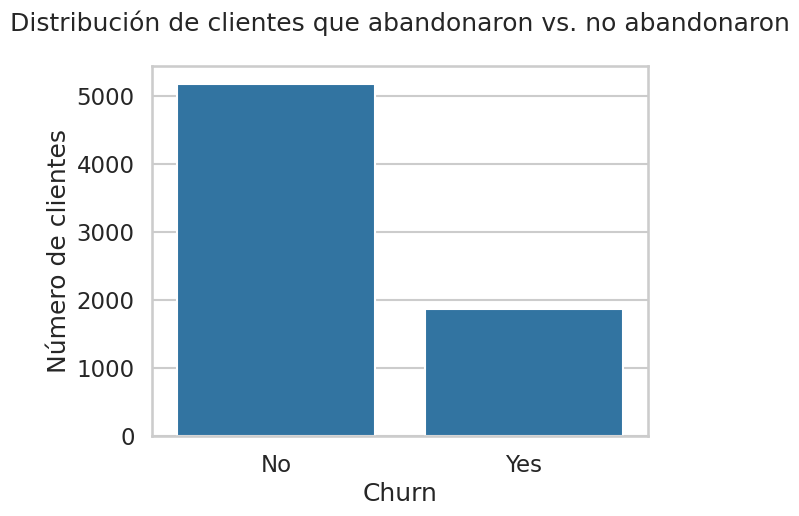

Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


In [ ]:
sns.countplot(data=df, x='Churn')
plt.title('Distribución de clientes que abandonaron vs. no abandonaron\n')
plt.ylabel('Número de clientes')
plt.show()

# Porcentaje
churn_rate = round(df['Churn'].value_counts(normalize=True) * 100,2)
print(churn_rate)

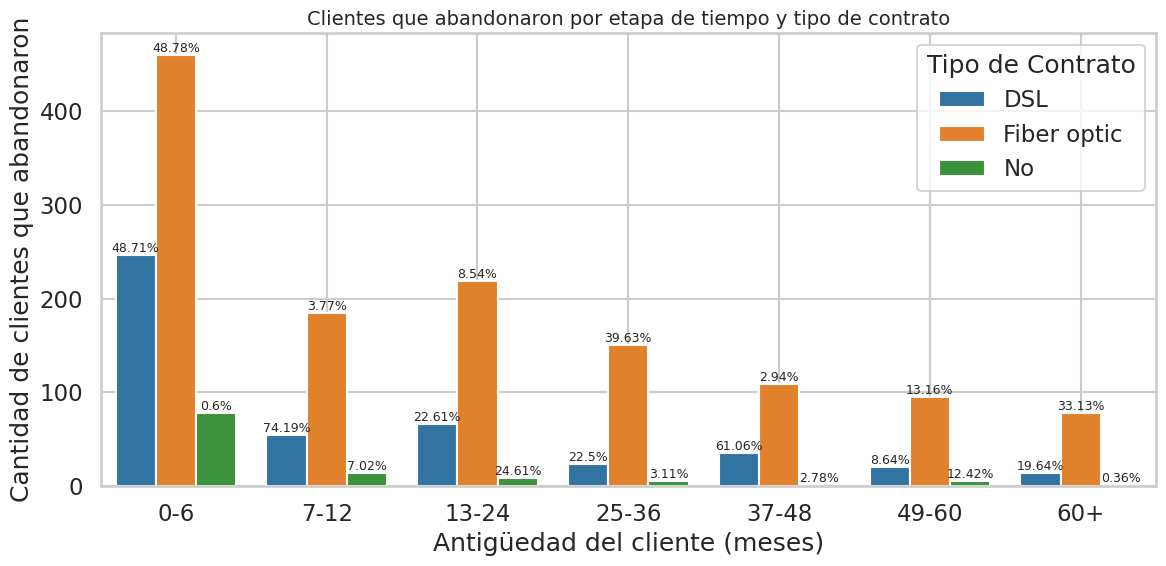

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Gráfico de barras con cantidad
barplot = sns.barplot(data=resumen, x='etapa_tiempo', y='Cantidad', hue='internet.InternetService')

# Añadir porcentaje como texto sobre cada barra
for bar, porcentaje in zip(barplot.patches, resumen['% Abandono']):
    height = bar.get_height()
    if height > 0:
        barplot.annotate(f'{porcentaje}%',
                         (bar.get_x() + bar.get_width() / 2, height),
                         ha='center', va='bottom', fontsize=9)

# Estética
plt.title('Clientes que abandonaron por etapa de tiempo y tipo de contrato', fontsize=14)
plt.xlabel('Antigüedad del cliente (meses)')
plt.ylabel('Cantidad de clientes que abandonaron')
plt.legend(title='Tipo de Contrato')
plt.tight_layout()
plt.grid(True)
plt.show()

Los clientes con fibra óptica y poco tiempo de suscripción abandonan más temprano

El servicio "No" (sin internet) tiene mayor rotación

Los clientes que llevan más tiempo son más leales a un tipo de servicio

In [ ]:
# Crear una columna de etapas por antigüedad
df['etapa_tiempo'] = pd.cut(df['customer.tenure'],
                             bins=[0, 6, 12, 24, 36, 48, 60, df['customer.tenure'].max()],
                             labels=['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '60+'])

# Agrupar los clientes que se fueron
df_abandono = df[df['Churn'] == 'Yes']

# Crear los grupos por etapa de tiempo e InternetService
resumen = df_abandono.groupby(['etapa_tiempo', 'internet.InternetService'], observed=True).size().reset_index(name='Cantidad')

# Total de clientes (se hayan ido o no)
totales_etapa = df.groupby(['etapa_tiempo', 'internet.InternetService'], observed=True).size().reset_index(name='Total')

# Unir ambos DataFrames por las mismas columnas
resumen = pd.merge(resumen, totales_etapa, on=['etapa_tiempo', 'internet.InternetService'])

# Calcular el porcentaje de abandono
resumen['% Abandono'] = round((resumen['Cantidad'] / resumen['Total']) * 100, 2)


# Filtrar clientes que se fueron
df_abandono = df[df['Churn'] == 'Yes'].copy()

# Crear la columna por etapas de tiempo
df_abandono['etapa_tiempo'] = pd.cut(df_abandono['customer.tenure'],
                                      bins=[0, 12, 24, 36, 48, 60, 72],
                                      labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

# Agrupar por etapa y tipo de contrato
resumen = df_abandono.groupby(['etapa_tiempo', 'account.Contract'],observed =True)['customerID'].count().reset_index(name='Cantidad')

# Total por grupo para calcular % de abandono
totales = df.groupby(['etapa_tiempo', 'account.Contract'],observed=True)['customerID'].count().reset_index(name='Total')
resumen = pd.merge(resumen, totales, on=['etapa_tiempo', 'account.Contract'])
resumen['% Abandono'] = round((resumen['Cantidad'] / resumen['Total']) * 100, 2)


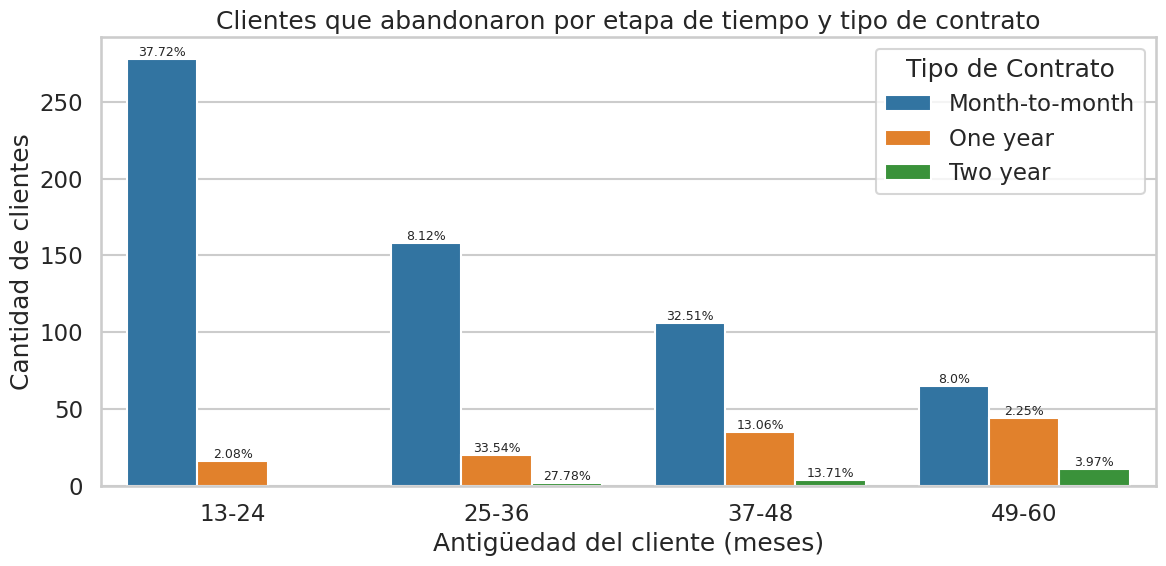

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

barplot = sns.barplot(data=resumen, x='etapa_tiempo', y='Cantidad', hue='account.Contract')

# Agregar texto con porcentajes
for bar, porcentaje in zip(barplot.patches, resumen['% Abandono']):
    height = bar.get_height()
    if height > 0:
        barplot.annotate(f'{porcentaje}%',
                         (bar.get_x() + bar.get_width() / 2, height),
                         ha='center', va='bottom', fontsize=9)

plt.title('Clientes que abandonaron por etapa de tiempo y tipo de contrato')
plt.xlabel('Antigüedad del cliente (meses)')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Tipo de Contrato')
plt.tight_layout()
plt.show()

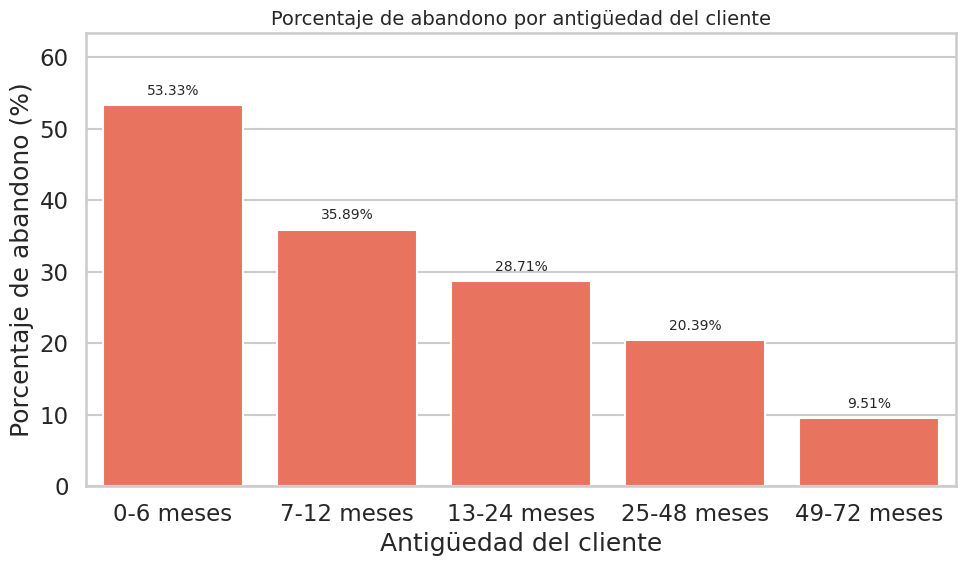

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=etapas_churn.index, y=etapas_churn['% Abandono'], color='tomato')

# Añadir etiquetas sobre las barras
for i, val in enumerate(etapas_churn['% Abandono']):
    plt.text(i, val + 1, f'{val}%', ha='center', va='bottom', fontsize=10)

# Títulos y etiquetas
plt.title('Porcentaje de abandono por antigüedad del cliente', fontsize=14)
plt.xlabel('Antigüedad del cliente')
plt.ylabel('Porcentaje de abandono (%)')
plt.ylim(0, etapas_churn['% Abandono'].max() + 10)  # margen para etiquetas

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
mayores_65 = df[(df['customer.SeniorCitizen'] == 1) & (df['Churn'] == 'Yes')]
mayores_65

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Antigüedad,etapa_tiempo
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,13-24 meses,13-24
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,0-6 meses,0-6
18,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,DSL,...,No,No,Yes,One year,No,Credit card (automatic),62.70,2791.5,25-48 meses,37-48
19,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,DSL,...,No,No,No,Month-to-month,Yes,Electronic check,25.10,25.1,0-6 meses,0-6
41,0067-DKWBL,Yes,Male,1,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Electronic check,49.25,91.1,0-6 meses,0-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7201,9907-SWKKF,Yes,Female,1,No,No,1,No,No phone service,DSL,...,No,No,No,Month-to-month,No,Mailed check,25.05,25.05,0-6 meses,0-6
7204,9912-GVSEQ,Yes,Female,1,Yes,No,26,Yes,Yes,Fiber optic,...,No,No,Yes,Month-to-month,Yes,Electronic check,93.85,2381.55,25-48 meses,25-36
7234,9947-OTFQU,Yes,Male,1,No,No,15,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,74.40,1074.3,13-24 meses,13-24
7243,9961-JBNMK,Yes,Male,1,No,No,21,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),96.80,2030.3,13-24 meses,13-24


In [ ]:
sns.set_theme(style='ticks', context='talk', palette='tab10')

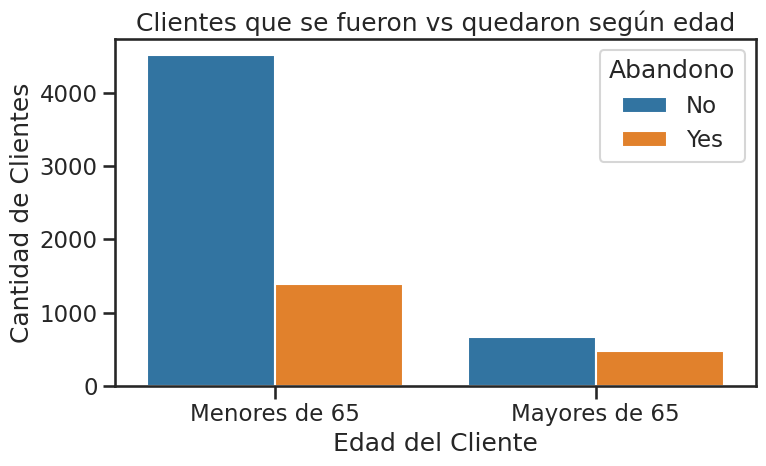

Tasa de abandono global (Yes vs No):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Tasa de abandono para clientes mayores de 65 años):
       Porcentaje
Churn            
No      58.318739
Yes     41.681261

Tasa de Abandono para clientes menores de 65 años):
       Porcentaje
Churn            
No      76.393832
Yes     23.606168

En total abandonaron: 26.54% Clientes
Abandono clientes mayores de 65 años): 41.68%
Abandono clientes menos de 65 años): 23.61%
En total abandonaron: 26.54% clientes



In [ ]:
grouped = df.groupby(['customer.SeniorCitizen', 'Churn']).size().reset_index(name='Cantidad')

# Convertir 0/1 a etiquetas más claras
grouped['Edad'] = grouped['customer.SeniorCitizen'].map({0: 'Menores de 65', 1: 'Mayores de 65'})

# Gráfico de barras agrupadas
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='Edad', y='Cantidad', hue='Churn', palette='tab10')

plt.title('Clientes que se fueron vs quedaron según edad')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Edad del Cliente')
plt.legend(title='Abandono')
plt.tight_layout()
plt.show()

# Porcentaje
# 1) Tasa de churn global
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Tasa de abandono global (Yes vs No):")
print(churn_rate)
print()

# 2) Filtrar clientes Senior (customer.SeniorCitizen == 1)
mayores_65 = df[df['customer.SeniorCitizen'] == 1]

# 2.1) Dentro de ese subconjunto, calcular churn (% Yes vs No)
senior_churn = mayores_65['Churn'].value_counts(normalize=True) * 100
print("Tasa de abandono para clientes mayores de 65 años):")
print(senior_churn.to_frame(name='Porcentaje'))
print()

# 3) Filtrar clientes No Senior (customer.SeniorCitizen == 0)
menores_65 = df[df['customer.SeniorCitizen'] == 0]

# 3.1) Dentro de ese subconjunto, calcular churn (% Yes vs No)
no_senior_churn = menores_65['Churn'].value_counts(normalize=True) * 100
print("Tasa de Abandono para clientes menores de 65 años):")
print(no_senior_churn.to_frame(name='Porcentaje'))
print()

# 4) Si solo quieres el porcentaje de churn “Yes” en cada grupo:
abandono_total = (df['Churn'] == 'Yes').mean() * 100
abandonomas65 = (mayores_65['Churn'] == 'Yes').mean() * 100
abanmenos65 = (menores_65['Churn'] == 'Yes').mean() * 100

print(f"En total abandonaron: {abandono_total:.2f}% Clientes")
print(f"Abandono clientes mayores de 65 años): {abandonomas65:.2f}%")
print(f"Abandono clientes menos de 65 años): {abanmenos65:.2f}%")

# 1) Porcentaje de churn global (solo “Yes”)
abandonaron = (df['Churn'] == 'Yes').mean() * 100
print(f"En total abandonaron: {abandonaron:.2f}% clientes")
print()




##📄Informe final

Objetivo del análisis:
Identificar las posibles causas del abandono de clientes en la empresa Telecom X, utilizando la información contenida en la base de datos entregada.

🔍 Hallazgos Principales
A partir del análisis exploratorio y gráfico realizado, se identificaron las siguientes tendencias clave entre los clientes que abandonaron la empresa:

Tipo de Servicio:

La mayoría de los clientes que abandonan el servicio están suscritos a servicios de fibra óptica y tienen activa la línea telefónica.

Antigüedad del Cliente:

El mayor índice de abandono se concentra en clientes con menos de 7 meses de permanencia (etapa inicial del ciclo de vida).

Tipo de Contrato:

La mayoría de los clientes que abandonan tienen contratos de mes a mes, lo que facilita su salida sin penalidades.


⚠️ Posibles Causas del Abandono
Con base en los datos y hallazgos anteriores, se sugieren las siguientes causas potenciales del abandono:

Expectativas no cumplidas: Posible falsa publicidad o sobreventa de beneficios del servicio de fibra óptica y telefonía.

Calidad del servicio: Problemas técnicos o de atención al cliente durante los primeros meses, cuando el cliente es más vulnerable.

Ausencia de fidelización: Falta de propuestas de valor atractivas o incentivos para mantener a los nuevos clientes.

Competencia y comparación: Clientes que prueban el servicio por poco tiempo y luego se cambian a otras empresas con mejores planes o precios.

Flexibilidad contractual excesiva: El contrato mes a mes da mucha facilidad para abandonar sin consecuencias.

Falta de seguimiento postventa: Posible falta de contacto proactivo con nuevos clientes para garantizar satisfacción inicial.

✅ Recomendaciones
Revisar la oferta de servicios de fibra óptica y telefonía, especialmente para clientes nuevos, asegurando que se cumpla lo prometido.

Diseñar campañas de fidelización temprana, que refuercen la relación con el cliente durante los primeros 6 meses.

Implementar encuestas de satisfacción post instalación y en los primeros 3 meses para detectar problemas a tiempo.

Mejorar la atención técnica y soporte, enfocándose en los clientes con contrato mensual.

Reformular contratos mes a mes, incluyendo beneficios por permanencia o migración a contratos más estables.

📌 Conclusión
Los clientes nuevos con contratos flexibles y servicios de fibra óptica están abandonando en una etapa crítica. Atender esta situación con acciones preventivas e inteligentes puede mejorar la retención de clientes y reducir significativamente los costos de captación.